In [1]:

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [132]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [133]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[:10], '\n')
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[-10:])

((13730, 166), (4576, 46))

In [134]:
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
            'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
features_corr = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
                 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
df_train = train[features_corr]
df_test = test[features]

In [135]:
df_train.shape

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,43,RS,24,M,1,1,1,4,1,NaN,...,520.0,D,D,C,A,A,C,H,A,399.4
1,23,CE,17,F,3,1,2,0,2,1.0,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,23,CE,21,F,3,1,3,0,1,NaN,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,33,RJ,25,F,0,1,1,9,1,NaN,...,NaN,H,E,E,C,B,C,F,D,NaN
4,13,AM,28,M,2,1,1,4,1,NaN,...,NaN,E,D,C,A,A,B,F,A,NaN


In [136]:

# Viewing training data:
train.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,41,PR,22,F,3,1,1,5,1,NaN,...,40.0,420.0,B,A,C,A,A,C,C,A
1,21,MA,26,F,3,1,1,8,1,NaN,...,100.0,580.0,E,B,C,B,B,B,F,A
2,23,CE,21,M,1,1,2,0,2,3.0,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,15,PA,27,F,3,1,1,8,1,NaN,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,41,PR,18,M,1,1,2,0,2,1.0,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [137]:

df_train.isnull().sum()

((13730, 47), (4576, 46))

In [138]:
df_test.isnull().sum()

In [139]:

df_train.fillna(0,inplace=True)

,type,amount,null_values (%),unique
CO_UF_RESIDENCIA,int64,0,0.000000,27
SG_UF_RESIDENCIA,object,0,0.000000,27
NU_IDADE,int64,0,0.000000,55
TP_SEXO,object,0,0.000000,2
TP_COR_RACA,int64,0,0.000000,6
TP_NACIONALIDADE,int64,0,0.000000,5
TP_ST_CONCLUSAO,int64,0,0.000000,4
TP_ANO_CONCLUIU,int64,0,0.000000,11
TP_ESCOLA,int64,0,0.000000,4
TP_ENSINO,float64,9448,68.812819,3


In [140]:
df_test.fillna(0,inplace=True)

,type,amount,null_values (%),unique
CO_UF_RESIDENCIA,int64,0,0.000000,27
SG_UF_RESIDENCIA,object,0,0.000000,27
NU_IDADE,int64,0,0.000000,46
TP_SEXO,object,0,0.000000,2
TP_COR_RACA,int64,0,0.000000,6
TP_NACIONALIDADE,int64,0,0.000000,5
TP_ST_CONCLUSAO,int64,0,0.000000,4
TP_ANO_CONCLUIU,int64,0,0.000000,11
TP_ESCOLA,int64,0,0.000000,3
TP_ENSINO,float64,3096,67.657343,3


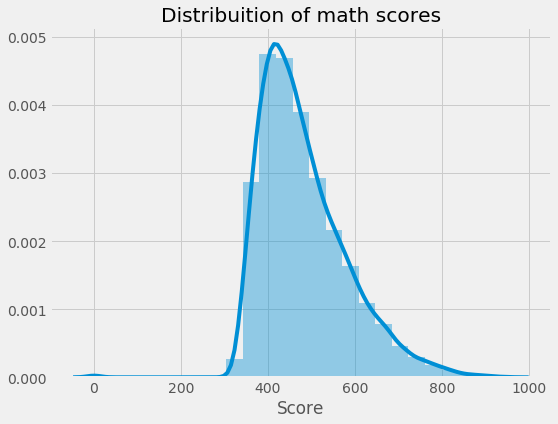

In [141]:
y_train = df_train['NU_NOTA_MT']
df_train.drop('NU_NOTA_MT', axis=1, inplace=True)
x_train = df_train
x_test = df_test[features]
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [142]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [143]:

regressor.fit(x_train, y_train)

Kurtosis: 1.4225025820577502
Asymmetry: 0.9206896733932955


In [144]:

x_test = df_test[features] 
x_test = sc.transform(x_test)

In [145]:

y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

C:\Users\barba\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((13730, 20), (4576, 19))

In [146]:

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

In [147]:
y_pred_test

C:\Users\barba\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047,NU_NOTA_MT
0,M,1,1,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,A,399.4
1,F,3,2,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,A,459.8
2,F,3,1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,D,D,C,A,A,A,A,-100.0
3,F,0,1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,H,E,E,C,B,C,D,-100.0
4,M,2,1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,E,D,C,A,A,B,A,-100.0


In [148]:
submission = pd.DataFrame()
submission['NU_INSCRICAO'] = test.NU_INSCRICAO
submission['NU_NOTA_MT'] = y_pred_test.round(1)

,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,F,3,1,464.8,443.5,431.8,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,A
1,F,3,1,391.1,491.1,548.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,A
2,M,1,2,595.9,622.7,613.6,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,A
3,F,3,1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,H,E,G,B,B,A,A
4,M,1,2,592.9,492.6,571.4,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,A


NameError: name 'setup' is not defined

NameError: name 'compare_models' is not defined

NameError: name 'create_model' is not defined

NameError: name 'tune_model' is not defined

NameError: name 'predict_model' is not defined

NameError: name 'tuning_model' is not defined

NameError: name 'plot_model' is not defined

NameError: name 'plot_model' is not defined

NameError: name 'predict_model' is not defined

NameError: name 'predictions' is not defined

KeyError: 'NU_NOTA_MT'

NameError: name 'y_predict' is not defined